# Homework 1 Edgar Oganesian 

ARC browser VS Safari browser

I choose Safari browser for two main reason. First of all, it is widley know that Google Chrome is the most dominant browser in terms of the number of active user and the market share. So I thought that comparing ARC to Safari, which is consistantly one of the top browsers on the market and constantly improves its market share. In addition, both browsers consistantly bring something new to the browsing space, like reading mode on Safari or efficient tab managment on the Arc browser.

You can learn more about the data in the data.pdf file in the data folder.

In [33]:
import pandas as pd

data = pd.read_csv('data.csv')

data.head()

,Date,Chrome,IE,Firefox,Safari,Opera,Android,UC Browser,Samsung Internet,Edge,...,AOL,SeaMonkey,Openwave,Phantom,SonyEricsson,Instabridge,Pale Moon,Obigo,Jasmine,Other
0,2009-01,1.37,64.97,26.85,2.79,3.07,0.01,0.0,0.0,0.0,...,0.27,0.04,0.02,0.0,0.02,0.0,0.0,0.0,0.0,0.20
1,2009-02,1.50,63.98,27.66,2.83,3.09,0.01,0.0,0.0,0.0,...,0.26,0.03,0.02,0.0,0.02,0.0,0.0,0.0,0.0,0.19
2,2009-03,1.71,62.02,29.17,3.02,3.09,0.02,0.0,0.0,0.0,...,0.25,0.03,0.02,0.0,0.03,0.0,0.0,0.0,0.0,0.19
3,2009-04,2.05,61.34,29.41,3.09,3.12,0.02,0.0,0.0,0.0,...,0.23,0.03,0.02,0.0,0.03,0.0,0.0,0.0,0.0,0.17
4,2009-05,2.40,61.55,28.50,2.95,3.41,0.02,0.0,0.0,0.0,...,0.21,0.03,0.02,0.0,0.03,0.0,0.0,0.0,0.0,0.18


Let's begin by separating the data we need from the dataset.

In [36]:
data['Date'] = pd.to_datetime(data['Date'])
data['Safari'] = data['Safari'].astype(float)
data['months'] = (data['Date'] - data['Date'].min()).dt.days / 30

# Assume market potential of Safari (M) is 1.5 billion users for simplicity
M = 1500 

print(data[['Date', 'months', 'Safari']].head())

        Date    months  Safari
0 2009-01-01  0.000000    2.79
1 2009-02-01  1.033333    2.83
2 2009-03-01  1.966667    3.02
3 2009-04-01  3.000000    3.09
4 2009-05-01  4.000000    2.95


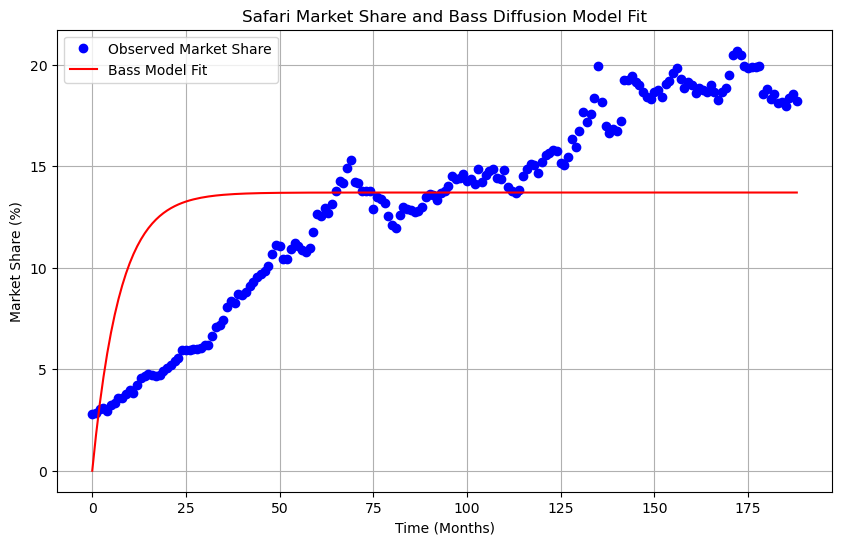

(0.1371112578869271, 8.29573115367862e-22, 99.99999999849076)

In [39]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def bass_model(t, p, q, m):
    # p: coefficient of innovation
    # q: coefficient of imitation
    # m: market potential
    adoption = m * ((p + (q - p) * np.exp(-(p + q) * t)) / (1 + (q/p) * np.exp(-(p + q) * t))**2)
    return adoption

time = np.arange(len(data))  
safari_market_share = data['Safari'].values  

params, _ = curve_fit(bass_model, time, safari_market_share, bounds=(0, [1, 1, 100]))

p, q, m = params

plt.figure(figsize=(10,6))
plt.plot(time, safari_market_share, 'bo', label="Observed Market Share")
plt.plot(time, bass_model(time, *params), 'r-', label="Bass Model Fit")
plt.title('Safari Market Share and Bass Diffusion Model Fit')
plt.xlabel('Time (Months)')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display estimated parameters
p, q, m

Since this is a browser, I belive that it would be fair to choose a global scope. As the browser is not restricted to any specific country or platform. Arc targets a broader range of users, from creative professionals to general web users, which justifies this global scope.

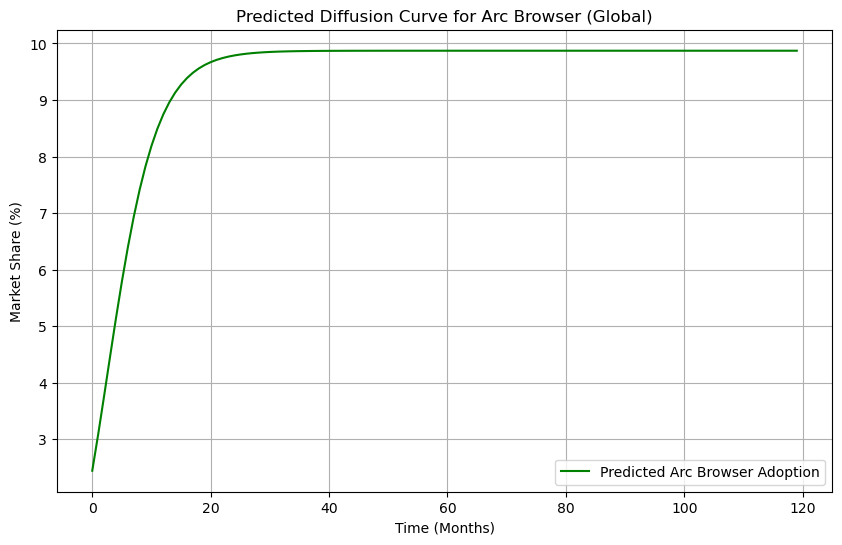

In [42]:
p_arc = p * 0.9  # 10% lower innovation
q_arc = q + 0.10  # Increasing imitation slightly due to faster technological spread
m_arc = 0.8 * m
time_future = np.arange(0, 120) 
arc_adoption = bass_model(time_future, p_arc, q_arc, m_arc)

plt.figure(figsize=(10,6))
plt.plot(time_future, arc_adoption, 'g-', label="Predicted Arc Browser Adoption")
plt.title('Predicted Diffusion Curve for Arc Browser (Global)')
plt.xlabel('Time (Months)')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Assuming the total market size is 5 blillion users for simplicity
market_size = 5000000000
arc_adopters = arc_adoption * market_size / 100 

arc_adoption_df = pd.DataFrame({
    'Month': time_future + 1,  
    'Adopters': arc_adopters
})
print(arc_adoption_df.head())
print (arc_adoption_df.tail())

   Month      Adopters
0      1  1.525578e+08
1      2  1.926949e+08
2      3  2.351636e+08
3      4  2.784225e+08
4      5  3.209734e+08
     Month      Adopters
115    116  6.170007e+08
116    117  6.170007e+08
117    118  6.170007e+08
118    119  6.170007e+08
119    120  6.170007e+08


Above is the estimated number of Arc browser adopters, based on the global market size of 5 billion users. I do belive that Arc browser has a huge potential. Although, browsers is a very competitive market, Arc brings somthing new to the table. So I belive that, in the future, Arc might even perform better than I predicted.